# **Wrong Initialization Techniques**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



**Things not to do**
*   Zero Initialization(Vanishing Gradient for Sigmoid,tanh and Incapablility to capture Non linearity for  ReLu,  as weights per neuron equal ,it behaves like perceptron)
*   Constant Initialization (Incapablility to capture Non linearity for  all, as weights per neuron equal.)
*   Small Random (Vanishing Gradient for Sigmoid,tanh and Slow Training or Convergence for ReLu)
*   Large Random (Vanishing Gradient for Sigmoid,tanh and Unstable Training for ReLu)





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
x,y = datasets.make_moons(n_samples=100, noise=0.4, random_state=42)

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 1. Zero Initial Techniques
### Assuming Activation for Hidden Layers

*   sigmoid (Training with same weight per neuron, behaves like perceptron, can't capture linearity)
*   tanh (Result: No Training)
*   Relu (Result: No Training,100% Dying Relu Problem)






In [4]:
# Change the activation in 1st layer and do.
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.2812 - loss: 0.8882 - val_accuracy: 0.3750 - val_loss: 0.8595
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3229 - loss: 0.8656 - val_accuracy: 0.3750 - val_loss: 0.8569
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3333 - loss: 0.8528 - val_accuracy: 0.3750 - val_loss: 0.8543
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3229 - loss: 0.8701 - val_accuracy: 0.3750 - val_loss: 0.8516
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3125 - loss: 0.8677 - val_accuracy: 0.3750 - val_loss: 0.8490
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3229 - loss: 0.8588 - val_accuracy: 0.3750 - val_loss: 0.8463
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2917 - loss: 0.8602 - val_accuracy: 0.3750 - val_loss: 0.8437
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3125 - loss: 0.8565 - val_accuracy: 0.3750 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

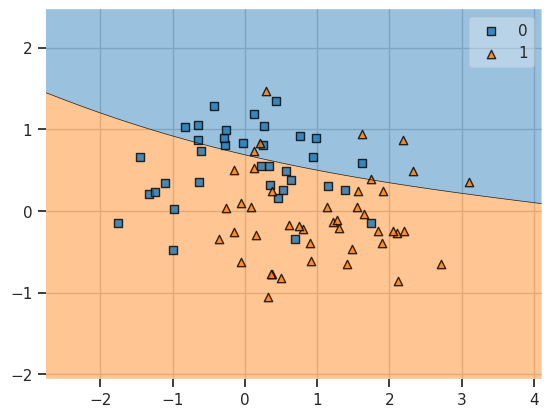

In [5]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

In [6]:
model.get_weights()

[array([[ 0.06600044, -0.01550474,  0.3079282 ,  0.06166313],
        [ 0.27393487, -0.3045183 ,  0.11511852, -0.91577584]],
       dtype=float32),
 array([-0.09654781, -0.1158603 , -0.041254  ,  0.13144065], dtype=float32),
 array([[-0.8806396 ],
        [-0.4562901 ],
        [-0.140259  ],
        [ 0.33895096]], dtype=float32),
 array([0.09886371], dtype=float32)]

In [7]:
initial_weights = model.get_weights()

In [8]:
initial_weights[0]= np.zeros(model.get_weights()[0].shape)
initial_weights[1]= np.zeros(model.get_weights()[1].shape)
initial_weights[2]= np.zeros(model.get_weights()[2].shape)
initial_weights[3]= np.zeros(model.get_weights()[3].shape)

In [9]:
model.set_weights(initial_weights)

In [10]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 0.4792 - loss: 0.6932 - val_accuracy: 0.4375 - val_loss: 0.6932
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4375 - loss: 0.6932 - val_accuracy: 0.5625 - val_loss: 0.6931
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5417 - loss: 0.6931 - val_accuracy: 0.5625 - val_loss: 0.6930
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 0.5625 - val_loss: 0.6929
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5312 - loss: 0.6930 - val_accuracy: 0.5625 - val_loss: 0.6929
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5625 - loss: 0.6929 - val_accuracy: 0.5625 - val_loss: 0.6928
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5625 - val_loss: 0.6927
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5417 - loss: 0.6928 - val_accuracy: 0.5625 - val_loss

In [12]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.08972394], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

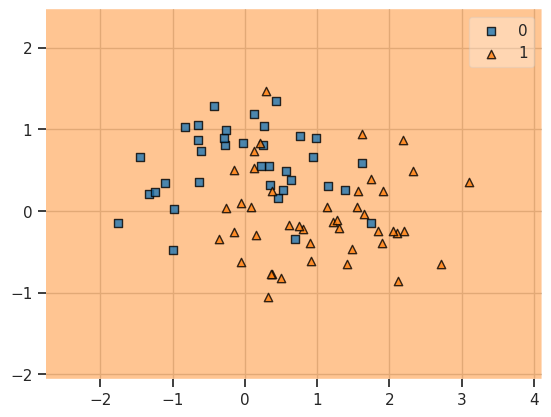

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

1.   For Sigmoid:
<br>
 1.1 Obs: The weights per neuron will be same (means w111 = w112 = w113)<br>1.2.
 Even we add 10000+ neurons with sigmoid activation with zero initialization, they can't capture non-linearity.<br>1.3 Means Behaves like perceptron, can't capture non linearity.
2.   For tanh---No training
3.   For Relu---No Training


# Non Zero Constant Value

In [14]:
initial_weights = model.get_weights()

In [15]:
initial_weights[0]= np.ones(model.get_weights()[0].shape)/5
initial_weights[1]= np.ones(model.get_weights()[1].shape)/5
initial_weights[2]= np.ones(model.get_weights()[2].shape)/5
initial_weights[3]= np.ones(model.get_weights()[3].shape)/5

In [16]:
model.set_weights(initial_weights)

In [17]:
model.get_weights()

[array([[0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2]], dtype=float32),
 array([0.2, 0.2, 0.2, 0.2], dtype=float32),
 array([[0.2],
        [0.2],
        [0.2],
        [0.2]], dtype=float32),
 array([0.2], dtype=float32)]

In [18]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.5417 - loss: 0.6933 - val_accuracy: 0.5625 - val_loss: 0.6654
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5312 - loss: 0.6930 - val_accuracy: 0.5625 - val_loss: 0.6650
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5521 - loss: 0.6857 - val_accuracy: 0.5625 - val_loss: 0.6646
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5521 - loss: 0.6874 - val_accuracy: 0.5625 - val_loss: 0.6642
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5312 - loss: 0.6927 - val_accuracy: 0.5625 - val_loss: 0.6639
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5312 - loss: 0.6963 - val_accuracy: 0.5625 - val_loss: 0.6635
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5625 - loss: 0.6751 - val_accuracy: 0.5625 - val_loss: 0.6631
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5417 - loss: 0.6836 - val_accuracy: 0.5625 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

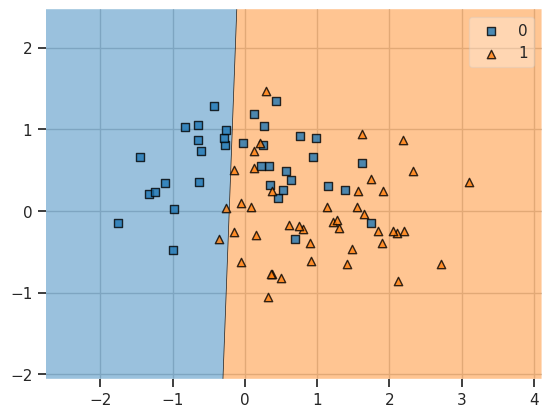

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

In [20]:
model.get_weights()

[array([[ 0.3889402,  0.3889402,  0.3889402,  0.3889402],
        [-0.0164186, -0.0164186, -0.0164186, -0.0164186]], dtype=float32),
 array([0.03091054, 0.03091054, 0.03091054, 0.03091054], dtype=float32),
 array([[0.34166312],
        [0.34166312],
        [0.34166312],
        [0.34166312]], dtype=float32),
 array([0.0722007], dtype=float32)]

1.   For Sigmoid:
<br>
 1.1 Obs: The weights per neuron will be same (means w111 = w112 = w113)<br>1.2.
 Even we add 10000+ neurons with sigmoid activation with zero initialization, they can't capture non-linearity.<br>1.3 Means Behaves like perceptron, can't capture non linearity.
2.   For tanh---behave like perceptron
3.   For Relu---behave like perceptron

# Random Weights Initialization

##### Change the activation except 1st layer and observe.

# Very small Random Weights

1.   Relu - Slow Training
2.   Sigmoid - Vanishing Gradient
3.   tanh - Vanishing Fradient



In [21]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.4062 - loss: 0.7224 - val_accuracy: 0.5625 - val_loss: 0.7087
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5521 - loss: 0.7205 - val_accuracy: 0.5625 - val_loss: 0.7079
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5521 - loss: 0.7248 - val_accuracy: 0.5625 - val_loss: 0.7072
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5729 - loss: 0.7200 - val_accuracy: 0.5625 - val_loss: 0.7065
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5521 - loss: 0.7210 - val_accuracy: 0.5625 - val_loss: 0.7058
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5729 - loss: 0.7188 - val_accuracy: 0.5625 - val_loss: 0.7051
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5417 - loss: 0.7187 - val_accuracy: 0.5625 - val_loss: 0.7044
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5521 - loss: 0.7169 - val_accuracy: 0.5625 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

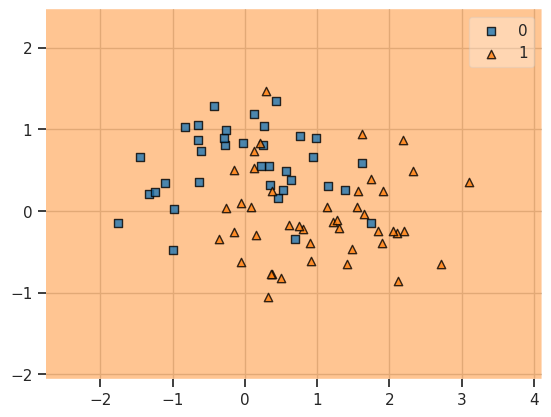

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

In [24]:
model.get_weights()

[array([[-0.5294727, -0.6401845],
        [ 0.7984   , -0.1738181]], dtype=float32),
 array([-0.10026849,  0.11726767], dtype=float32),
 array([[-0.6477225 ,  0.9039087 ],
        [ 0.21439166, -0.6296247 ]], dtype=float32),
 array([ 0.02848599, -0.10151095], dtype=float32),
 array([[ 1.1764741 , -0.03908384],
        [ 0.5310119 , -0.1907301 ]], dtype=float32),
 array([-0.11230781,  0.        ], dtype=float32),
 array([[-0.7451557 ,  0.45116156],
        [ 0.69930756, -0.36855143]], dtype=float32),
 array([ 0.        , -0.11684427], dtype=float32),
 array([[1.1726178 ],
        [0.69510037]], dtype=float32),
 array([0.09041944], dtype=float32)]

In [25]:
initial_weights = model.get_weights()

In [26]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1]) / 100
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1]) / 100
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1]) / 100
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1]) / 100
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1]) / 100
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [27]:
model.set_weights(initial_weights)

In [28]:
model.get_weights()

[array([[-0.00827021, -0.00568757],
        [ 0.01476014, -0.01914068]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01054743, -0.00960854],
        [-0.01721602,  0.00173665]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00531235, -0.00132187],
        [ 0.01702174, -0.00471215]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.0139425 , -0.00110953],
        [-0.01384203,  0.00164631]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01154506],
        [-0.00087008]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.4688 - loss: 0.6931 - val_accuracy: 0.5625 - val_loss: 0.6930
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 0.5625 - val_loss: 0.6929
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5521 - loss: 0.6930 - val_accuracy: 0.5625 - val_loss: 0.6928
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5625 - val_loss: 0.6928
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5729 - loss: 0.6927 - val_accuracy: 0.5625 - val_loss: 0.6927
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5521 - loss: 0.6928 - val_accuracy: 0.5625 - val_loss: 0.6926
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5938 - loss: 0.6924 - val_accuracy: 0.5625 - val_loss: 0.6926
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5625 - loss: 0.6926 - val_accuracy: 0.5625 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

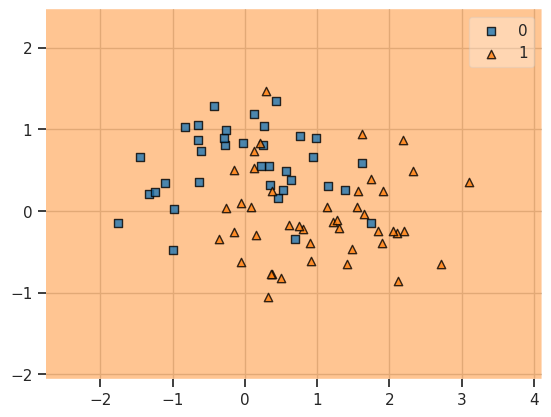

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

In [31]:
model.get_weights()

[array([[-0.00827021, -0.00568757],
        [ 0.01476014, -0.01914068]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01054743, -0.00960854],
        [-0.01721602,  0.00173665]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00531235, -0.00132187],
        [ 0.01702174, -0.00471215]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.0139425 , -0.00110953],
        [-0.01384203,  0.00164631]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01154506],
        [-0.00087008]], dtype=float32),
 array([0.08960617], dtype=float32)]

# Random Large Values [0,1]

1.   ReLu - Unstable Training
2.   Sigmoid - Vanishing Grad may takeplace
3.   tanh - Vanishing Grad may take place



In [32]:
initial_weights = model.get_weights()

In [33]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1])
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1])
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1])
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1])
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1])
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [34]:
model.set_weights(initial_weights)

In [35]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.3438 - loss: 2.0611 - val_accuracy: 0.3125 - val_loss: 1.2946
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3229 - loss: 1.8323 - val_accuracy: 0.3125 - val_loss: 1.2785
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2917 - loss: 1.8717 - val_accuracy: 0.3125 - val_loss: 1.2625
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2917 - loss: 1.8619 - val_accuracy: 0.3125 - val_loss: 1.2468
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2708 - loss: 1.9402 - val_accuracy: 0.3750 - val_loss: 1.2314
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2812 - loss: 1.8929 - val_accuracy: 0.3750 - val_loss: 1.2166
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2917 - loss: 1.7031 - val_accuracy: 0.3750 - val_loss: 1.2023
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3125 - loss: 1.8762 - val_accuracy: 0.3750 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

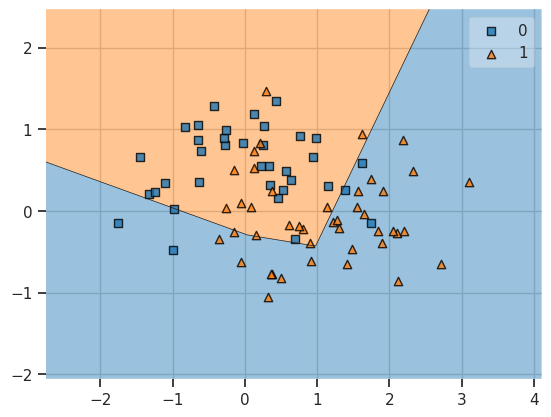

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

In [37]:
model.get_weights()

[array([[-0.3998567 ,  0.7891554 ],
        [-1.2471561 , -0.42768395]], dtype=float32),
 array([-0.1452291 , -0.15253246], dtype=float32),
 array([[ 2.623596  , -0.876602  ],
        [ 0.67486346, -0.9932734 ]], dtype=float32),
 array([-0.160686,  0.      ], dtype=float32),
 array([[ 2.7220244,  1.0303141],
        [ 1.6626228, -1.7699833]], dtype=float32),
 array([-0.16844298,  0.19135329], dtype=float32),
 array([[ 0.8124454 , -1.2942239 ],
        [-0.49813   , -0.01876636]], dtype=float32),
 array([-0.17517638,  0.        ], dtype=float32),
 array([[-0.63525134],
        [ 0.48111534]], dtype=float32),
 array([0.15349497], dtype=float32)]